In [1]:
from pivpy import pivpy, io, graphics
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob

file_list = sorted(glob.glob('../OpenPIV_results/Open_PIV_results_6_Test_*/*.txt'))
file_list
file_list.append(file_list.pop(2))
file_list

['../OpenPIV_results/Open_PIV_results_6_Test_0/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_1/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_2/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_3/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_4/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_5/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_6/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_7/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_8/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_9/field_A000.txt',
 '../OpenPIV_results/Open_PIV_results_6_Test_10/field_A000.txt']

In [3]:
def read_data(file_list):
    data = []
    frame = 0
    for f in file_list:
        data.append(io.load_txt(f,frame=frame))
        frame += 1

    data = xr.concat(data,dim='t')
    data.attrs['units']= ['pix','pix','pix/dt','pix/dt']
    return data
# file_list = sorted(glob.glob('../OpenPIV_results/Open_PIV_results_6_Test_1/*.txt'))

In [4]:
data = read_data(file_list)
# data.to_netcdf('OpenPIV_von_Karman_11maps.nc')

In [5]:
import matplotlib.pyplot as plt
def plot_data(data):
    fig, ax = plt.subplots(len(file_list),1,figsize=(10,50))
    # for ax in axs:
    for t in data.t.values:
        ax[t].quiver(data.x.data, data.y.data, data.u.isel(t=0).data.T, data.v.isel(t=0).data.T, color='r', scale=120)
        s = ax[t].pcolormesh(data.x,data.y,data.w.T.isel(t=0), shading='gouraud', vmin=-.3, vmax=.3,alpha=0.7)
        # ax.invert_yaxis()
        ax[t].set_aspect(1)
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(s, cax=cbar_ax)
    # fig.colorbar(s, orientation='horizontal')
    plt.show()

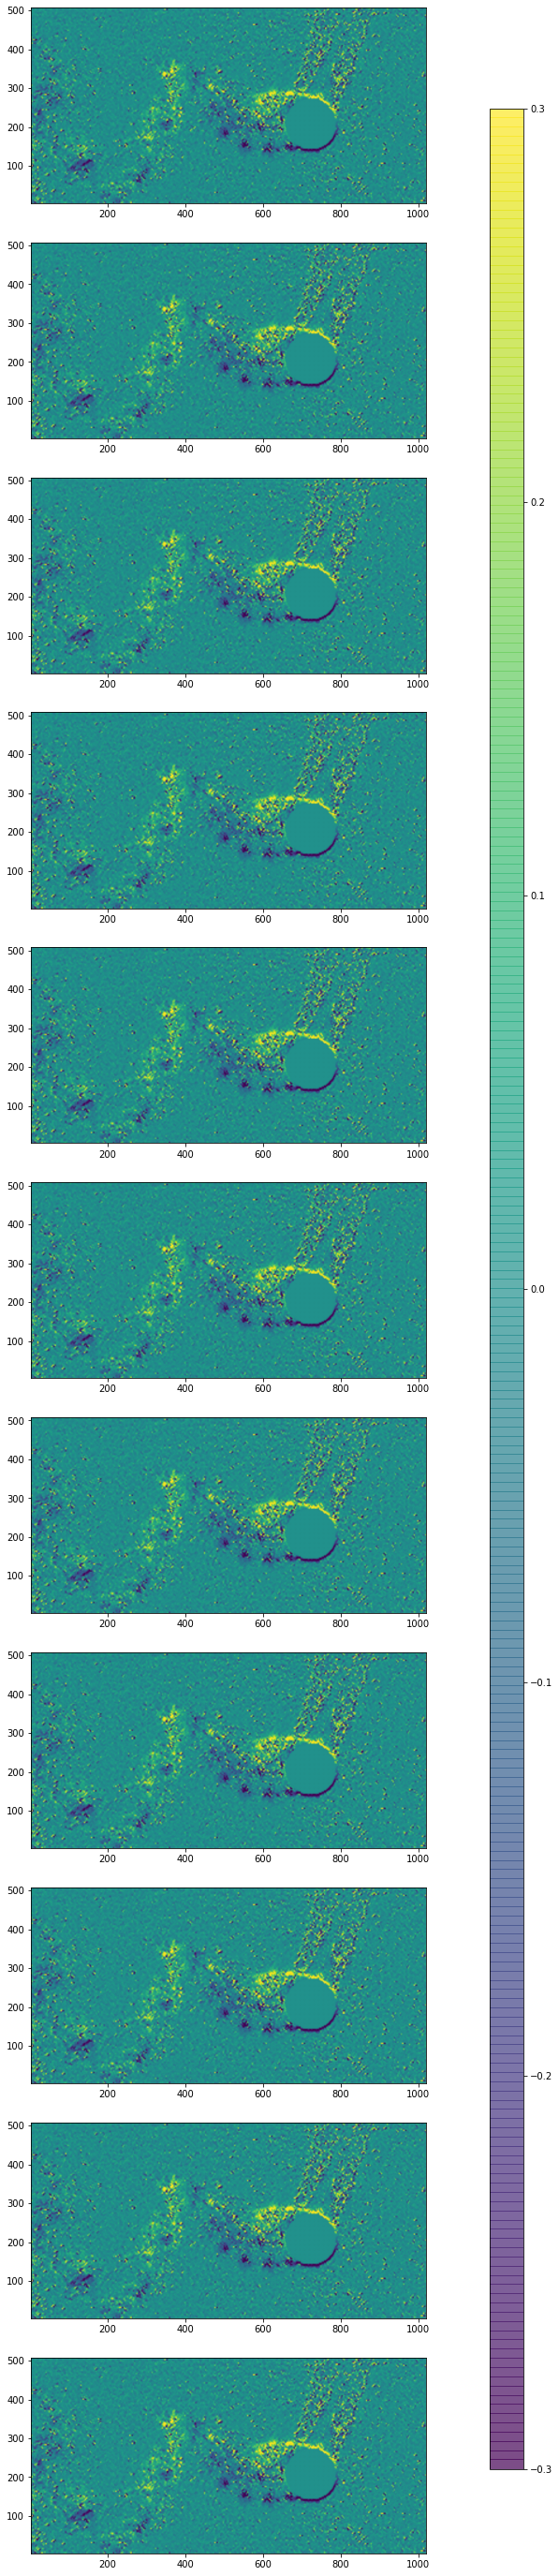

In [6]:
# data = read_data(file_list)
data.piv.vorticity();
plot_data(data)